# <center><font color = 'red'>House Price Forcast</font>

In [3]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston

from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression,ElasticNet

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [10]:
import warnings 
warnings.filterwarnings("ignore")

In [5]:
boston = load_boston()

x= boston.data
y= boston.target
y.shape

(506,)

In [7]:
x = pd.DataFrame(boston.data,columns = boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:>

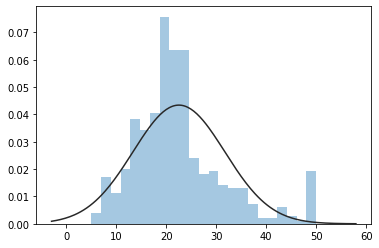

In [11]:
sns.distplot(tuple(y),kde=False,fit=st.norm)

In [12]:
x.shape

(506, 13)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=28)

ss= StandardScaler()

x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)

In [23]:
#Set the model name.
names = ['LinerRegression',
'Ridge',
'Lasso',
'Random Forrest',
'GBDT',
'Support Vector Regression',
'ElasticNet',
'XgBoost']

#Define the model.

# cv is the cross-validation idea here.

models = [LinearRegression(),
RidgeCV (alphas=(0.001,0.1,1),cv=3),
LassoCV (alphas=(0.001,0.1,1),cv=5),
RandomForestRegressor(n_estimators=10),
GradientBoostingRegressor(n_estimators=30),
SVR(),
ElasticNet(alpha=0.001,max_iter=10000),
XGBRegressor()]

# Output the R2 scores of all regression models.

#Define the R2 scoring function.
def R2(model,x_train, x_test, y_train, y_test):

    model_fitted = model.fit(x_train,y_train)
    y_pred = model_fitted.predict(x_test)
    score = r2_score(y_test, y_pred)

    return score

In [26]:
#Traverse all models to score.
for name,model in zip(names,models):
    score = R2(model,x_train, x_test, y_train, y_test)
    print("{}: {:.6f}, {:.4f}". format (name,score.mean() ,score.std()))


LinerRegression: 0.564115, 0.0000
Ridge: 0.563673, 0.0000
Lasso: 0.564049, 0.0000
Random Forrest: 0.675507, 0.0000
GBDT: 0.734582, 0.0000
Support Vector Regression: 0.517260, 0.0000
ElasticNet: 0.563992, 0.0000
XgBoost: 0.759977, 0.0000


In [34]:
parameters = {
'kernel': ['linear', 'rbf'],
'C': [0.1, 0.5,0.9,1,5],
'gamma': [0.001,0.01,0.1,1]
}

#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [35]:

print("Optimal parameter list:", model.best_params_)
print("Optimal model:", model. best_estimator_)
print("Optimal R2 value:", model.best_score_)


Optimal parameter list: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Optimal model: SVR(C=5, gamma=0.1)
Optimal R2 value: 0.7965173649188232


In [37]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(x_train, y_train)

print("Optimal parameter list:", xgb_grid.best_params_)
print("Optimal model:", xgb_grid. best_estimator_)
print("Optimal R2 value:", xgb_grid.best_score_)



Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  1.1min finished


[12:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Optimal parameter list: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
Optimal model: XGBRegressor(base_score=0.5, booster='gbtr

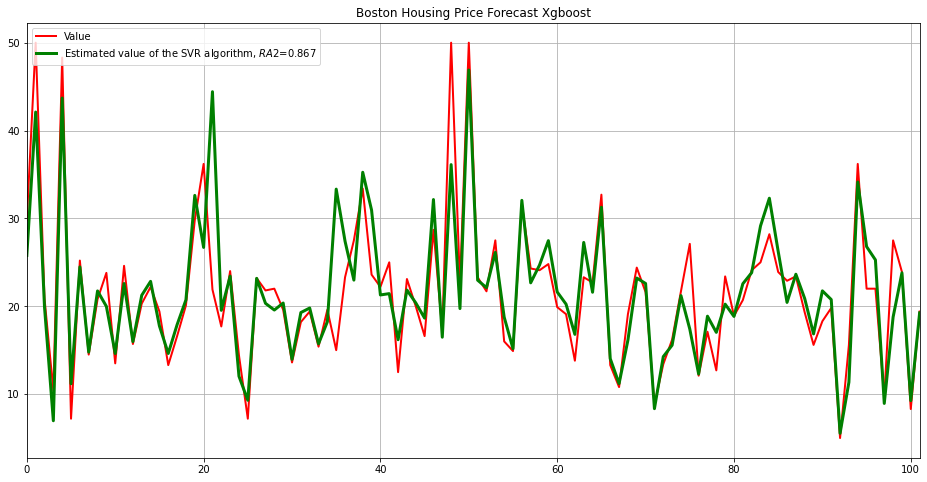

In [40]:
##Perform visualization.
ln_x_test = range(len(x_test))
y_predict = xgb_grid.predict (x_test)

#Set the canvas.

plt.figure (figsize=(16,8), facecolor='w')

#Draw with a red solid line.

plt.plot (ln_x_test, y_test, 'r-', lw=2, label=u'Value')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'g-', lw = 3, label=u'Estimated value of the SVR algorithm, $RA2$=%.3f' %
(xgb_grid.best_score_))
#Display in a diagram.

plt.legend (loc ='upper left')

plt.grid(True)

plt.title(u"Boston Housing Price Forecast Xgboost")
plt.xlim(0, 101)

plt.show()

# <center><font color = 'red'>Detail Of Linear Regression</font>

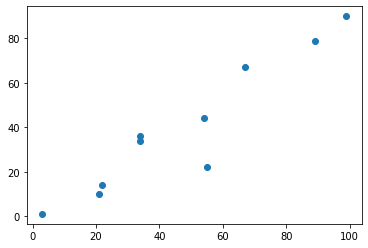

In [41]:
#lmport the required modules, numpy for calculation, and Matplotlib for drawing
import numpy as np
import matplotlib.pyplot as plt
#This code is for jupyter Notebook only
%matplotlib inline
# define data, and change list to array
x = [3,21,22,34,54,34,55,67,89,99]
x = np.array(x)
y = [1,10,14,34,44,36,22,67,79,90]
y = np.array(y)

#Show the effect of a scatter plot
plt.scatter (x,y)

In [53]:
#The basic linear regression model is wx+ b, and since this is a two-dimensional space, the model is
#ax+ b

def model(a, b, x):
    return a*x + b

#The most commonly used loss function of linear regression model is the loss function of mean
#variance difference
def loss_function(a, b, x, y):
    num = len(x)
    prediction=model(a,b,x)
    return (0.5/num) * (np.square(prediction-y)).sum()

#The optimization function mainly USES partial derivatives to update two parameters a and b
def optimize(a,b,x,y):
    num = len(x)
    prediction = model(a,b,x)
    #Update the values of A and B by finding the partial derivatives of the loss function on a and b
    da = (1.0/num) * ((prediction -y)*x).sum()
    db = (1.0/num) * ((prediction -y).sum())

    a=a -Lr*da
    b = b - Lr*db
    return a, b

#iterated function, return a and b
def iterate (a,b,x,y,times):
    for i in range(times):
        a,b = optimize (a,b,x,y)
        return a,b

    

[0.76081403]
[0.36742251]
[0.78934736] [0.36771908] 52.76363157527285


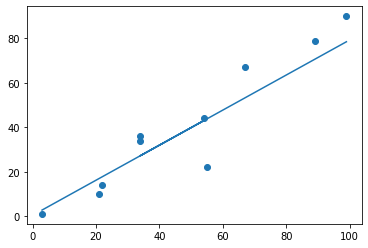

In [55]:

#lInitialize parameters and display
a = np.random.rand(1)
print(a)
b = np.random.rand(1)
print(b)
Lr = 1e-4

#For the first iteration, the parameter values, losses, and visualization after the iteration are displayed
a,b = iterate(a,b,x,y,1)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)

plt.scatter (x,y)

plt.plot(x,prediction)